In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt
import sklearn.linear_model
import sklearn.model_selection
import pandas as pd
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import load_iris
from IPython.display import Markdown as md

# Applied Machine Learning

## Ensembles

### Train/test split

- Our main goal is to measure performance properly
- Model perfect on the train set might be useless on the test set
- We never train on test data, re-using it makes it impossible to estimate the actual quality

### Who splits the data?

- Sometimes it is you
- In Kaggle you have the split made for you
- Good practice: the manager sets up the test set

### Pitfalls

- Train/test is usually 80/20 but it could change if you have extreme sizes
- Train and test should come from the same distribution
- Choosing your model based on test is actually quite wrong

### Train/validation/test split

- When we use test set score multiple time, we actually overfit
- We need an additional dataset
- In practice, you can't use test only once
- Be very careful making decision based on test set score

### Statistical estimators and ML

- In statistics, we often estimate something: means, variances, differences of means, ...
- To see ML models as estimators just use any metric: MSE, accuracy, ...
- Estimators have two important properties: bias and variance

### Estimator with high bias

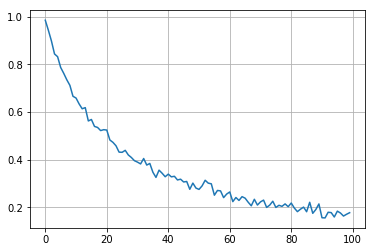

In [2]:
ys = [(np.random.randn(i).sum() + 1000.0) / (i + 1000.0) for i in range(10, 5000, 50)]
plt.plot(ys); plt.grid()

### Estimator with high variance

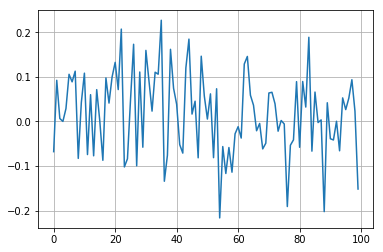

In [3]:
ys = [np.random.randn(100).mean() for _ in range(100)]
plt.plot(ys); plt.grid()

### Bias/variance in ML

- High bias means the model never can't fit well enough
- High variance means the model is unstable in fitting it well
- Linear models have high ...? 
- Decision trees have high ...?

### Bias/variance in ML

- Reducing bias usually means changing your model somehow
- Reducing variance is possible other way
- Hint: averaging helps

### The Condorcet's jury theorem

- There is a jury of $N$ individuals that make some decision
- The final decision is reached by majority vote
- The decision is either right or wrong
- How does the probability of correct decision changes if we change $N$?

### Averaging models

- We need a few models that are somehow different and independent
- Each model should be just good enough
- The more models we have, the better score we get
- Straightforward if we have a few training sets

### Bootstrap

- A useful *practical* trick to assign some accuracy to estimators
- Based on sampling with replacement

In [4]:
list(pd.Series([1, 2, 3]).sample(n=10, replace=True))

[2, 3, 3, 1, 2, 1, 2, 1, 2, 3]

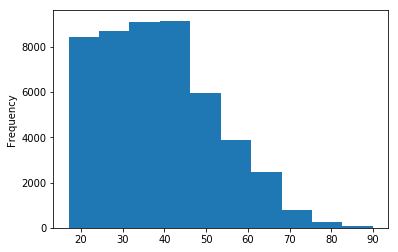

In [5]:
df = pd.read_csv('adult.csv')
df.age.plot.hist();

In [6]:
print("Mean is %f+-[?]" % (df.age.mean()))

Mean is 38.643585+-[?]


Generate slightly different dataset with sampling with replacement:

In [7]:
df.sample(frac=1.0, replace=True).age.mean()

38.68733876581631

Generate differents slightly datasets a few times:

In [8]:
means = []
for _ in range(800):
    means.append(df.sample(frac=1.0, replace=True).age.mean())
means[:10]

[38.5633880676467,
 38.65740551164981,
 38.662073625158676,
 38.60998730600713,
 38.53931042954834,
 38.63111666188936,
 38.580033577658575,
 38.63707464886778,
 38.597436632406534,
 38.59573727529585]

The histogram of generated means:

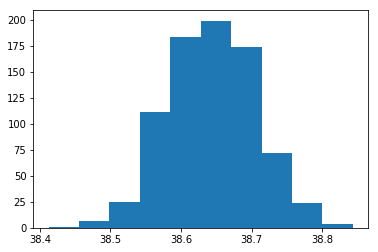

In [9]:
plt.hist(means);

### Confidence interval

- Bootstrapping makes CI really easy
- Given confidence level $p = 0.95$

In [10]:
p = 95
np.percentile(means, (100.0 - p) / 2.0), np.percentile(means, (100.0 + p) / 2.0)

(38.528540497932106, 38.765886941566684)

### Bagging

- **B**ootstrap **Agg**regat**ing**
- We use bootstrap to generate a few datasets
- On each dataset, we train a model
- These models form an ensemble:
$$f(x) = \mathop{avg}_{i} f_i(x)$$

### Random Forest

- An instance of bagging, in which we use decision trees
- One of the most popular algorithms
- Works out of box most of the time
- One slight detail - drop random features in each classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

### Boosting

- Other way to learn a few independent classifiers
- Iterative algorithm
- We learn $f_1$ to fit the labels
- We learn $f_2$ to fit the errors between predictions of $f_1$ and $y$ (residual)
- ....

### Gradient Boosting

- There is a pure beauty analogy betwen this algorithm and gradient descent
- The difference (residual) is actually the gradient of your loss function
- We will discuss the 'gradient' part later
- Each 'base' classifier is usually a tree, but can be a linear model (AdaBoost)

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

### Gradient tree boosting

- xgboost
- CatBoost
- LightGBM

### Hyperparameters

- Depth: gradient boosting needs much less than random forest
- Number of trees: a few hundreds usually suffice

### Next time

- Matrix factorization
- Embeddings